In [11]:
import pandas as pd
from pandas import Series, DataFrame
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv("311_calls_2months.csv")
df.head()

C:\Users\Rohitashwa\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3427: DtypeWarning: Columns (8,17,39,46,47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,29641524,01/06/2015 02:14:39 AM,NaN,CHALL,CHALL,Opinion for the Mayor,PUBLICSAFETY,NaN,NaN,NaN,...,NaN,NaN,NaN,1-1-1052163595,NaN,NaN,NaN,NaN,NaN,NaN
1,29636054,01/06/2015 02:09:30 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11372.0,70-06 ROOSEVELT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.746429,-73.895340,"(40.74642854264474, -73.89533997952648)"
2,29640523,01/06/2015 02:09:18 AM,NaN,NYPD,New York City Police Department,Animal Abuse,No Shelter,Residential Building,11416.0,101-10 107 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.686633,-73.835882,"(40.68663307825169, -73.83588154004453)"
3,29635476,01/06/2015 02:08:02 AM,NaN,DOT,Department of Transportation,Street Sign - Missing,St Name - Attached to Pole,Street,11233.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.677674,-73.913586,"(40.677673635302874, -73.91358587691806)"
4,29641040,01/06/2015 02:03:11 AM,01/06/2015 02:36:38 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10022.0,238 EAST 58 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.760497,-73.966047,"(40.76049674396275, -73.96604690111288)"


In [5]:
vc = df["Complaint Type"].value_counts()

In [9]:
# List of all unique Complaints
vc[vc == 1]
# How Many?
len(vc[vc == 1])

10

<AxesSubplot:>

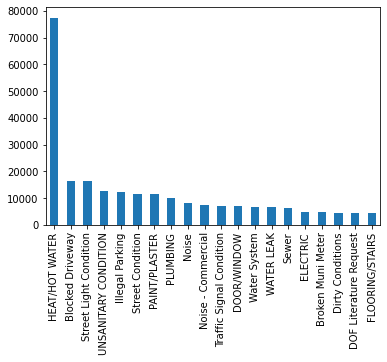

In [12]:
# Frrequrency of 20 most frequent complaints:
top20 = vc[:20]
top20.plot(kind="bar")

<AxesSubplot:>

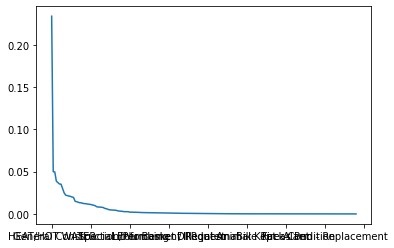

In [14]:
# Normalise the value counts plot
df["Complaint Type"].value_counts(normalize=True).plot()


<AxesSubplot:>

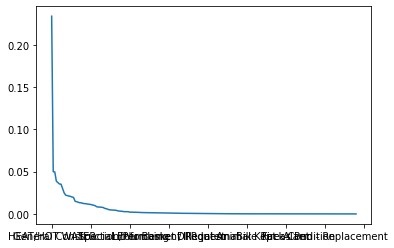

In [20]:
vc.apply(lambda x: x/sum(vc)).plot()

In [25]:
x = (vc.apply(lambda x: x/sum(vc)) == df["Complaint Type"].value_counts(normalize=True))
x.value_counts()

True    196
Name: Complaint Type, dtype: int64

## Note

It seems that ```value_counts(normalise = True)``` and the _lambda()_ method are idential.
However, the difference lies in how the **NaN** values are dealt with.

One of them drops Na's before processing while the other includes it in the division

In [45]:
# Find zip code through Borough

## Select only Borough and IncidentZip columns
df2  = df[["Borough","Incident Zip"]]

# Remove rows where either of the two columns are null
df2 = df2[df2["Borough"].notnull() & df2["Incident Zip"].notnull()]
df2["Incident Zip"]

1         11372.0
2         11416.0
3         11233.0
4         10022.0
5         11368.0
           ...   
331049    10012.0
331050    10452.0
331051    10472.0
331052    10036.0
331053    11385.0
Name: Incident Zip, Length: 298301, dtype: object

In [47]:
df2.drop_duplicates(subset="Incident Zip")

,Borough,Incident Zip
1,QUEENS,11372.0
2,QUEENS,11416.0
3,BROOKLYN,11233.0
4,MANHATTAN,10022.0
5,QUEENS,11368.0
...,...,...
324199,Unspecified,11580
324984,Unspecified,07047
325123,Unspecified,10708
325649,Unspecified,10583


In [58]:
df2.set_index('Incident Zip')["Borough"]

Incident Zip
11372.0       QUEENS
11416.0       QUEENS
11233.0     BROOKLYN
10022.0    MANHATTAN
11368.0       QUEENS
             ...    
10012.0    MANHATTAN
10452.0        BRONX
10472.0        BRONX
10036.0    MANHATTAN
11385.0       QUEENS
Name: Borough, Length: 298301, dtype: object